# Question 2 : Resolution analysis :
Poly:
https://josselin-garnier.org/wp-content/uploads/2025/01/polycopie-mva-2025.pdf#page=44.47

In [33]:
import numpy as np

In [41]:
z=0
N=64
w0=2*np.pi 
B=np.pi/4 
zref=np.array([5,100,0])
a=20
xn=np.zeros((N,3))
# print(xn)
for n in range(N):
    xn[n][0]=-a/2+a*(n-1)/(N-1)
M=64
M=60 
print("REMOE HERE ")
# discretize the frequency band
f0=w0-B
f1=w0+B
fband=np.linspace(f0,f1,M)

REMOE HERE 


In [35]:
import numpy as np

In [81]:
# 1 La green function , je ne sais pas comment elle s'écrit mais on va approximer par la partie 1 (?) 

class Green:
    def __init__(self):
        # self.c0=c0,
        # self.zref=zref
        pass 
    def __call__(self,w,x,y):
        return (1/(4*np.pi*np.linalg.norm(x-y)))*np.exp(1j*w*np.linalg.norm(x-y))

f=Green()
f(0,5,0)
# f(0,xn[0],zref)

f(1,5,6)

(0.04299589137143181+0.06696213335029096j)

In [82]:
xn_test=np.array([[5,0,0]])
zref_test=np.array([6,0,0])
f(w0,xn_test,zref_test)**2

(0.006332573977646112-3.102066580835253e-18j)

In [29]:
1/(4*np.pi)*np.exp(1j*1)==f(1,5,6)

True

In [84]:
rho_ref=1

class R_n:
    #correspond à Rnchapeau 
    def __init__(self,rho_ref,f0,f1,zref,xn):
        self.rho_ref=rho_ref
        self.f0=f0
        self.f1=f1
        self.xn=xn
        self.zref=zref
        self.green=Green()
    def __call__(self,n,w):
        def rn(n,w):
            # assert w in fband
            if w<self.f0 or w>self.f1:
                return 0 
            return self.rho_ref*self.green(w,self.xn[n],zref)**2
        return rn(n,w)

    
R_n(rho_ref,f0,f1,zref,xn)(0,w0)
# R_n(rho_ref,f0,f1,zref_test,xn_test)(0,w0)

(-3.070424805386075e-07+5.371818946225972e-07j)

In [68]:
xn_test=np.array([[5,0,0]])
zref_test=np.array([6,0,0])

In [70]:
1*f(w0,xn_test[0],zref)**2

(6.332573977646111e-07+4.975849699486568e-21j)

In [85]:
(1*f(w0,xn_test[0],zref)**2-R_n(rho_ref,f0,f1,zref_test,xn_test)(0,w0))

0j

# créons  l'imaging Function

In [88]:
Tn=1

In [ ]:
class Imagingfun:
    def __init__(self,xn,rho_ref,f0,f1,zref,fband):
        self.xn=xn
        self.rho_ref=rho_ref
        self.f0=f0
        self.f1=f1
        self.zref=zref
        self.rn=R_n(rho_ref=rho_ref,f0=f0,f1=f1,zref=zref,xn=xn)
        self.fband=fband
        self.M=len(fband)
        self.N=len(xn)
        self.dw=(f1-f0)/self.M
        self.green=Green()
        self.second_term=self.constructR()
    
    def constructR(self):
        result=np.zeros((self.N,self.M),dtype=complex)
        for n in range(self.N):
            for w in self.fband:
                result[n,w]=self.rn(n,w)
        return result

    def R(self,w,x,x_n):
        if w<self.f0 or w>self.f1:
            print("out of f_n for w",w)
            return 0
        # add fn
        fn= np.exp(-2j*Tn*w)
        return self.green(w,x_n,x)**2*fn
    def __call__(self,x):
        # we compute  the integrale
        Somme=0
        for n in range(self.N):
            Somme_n=0
            for w in self.fband:
                first_term=np.conjugate(self.R(w=w,x=x,x_n=self.xn[n]))
                second_term=self.second_term[n,w]
                Somme_n+=first_term*second_term*self.dw
            Somme+=Somme_n
        print("whole somme",Somme)
        return np.real(Somme)

I_fun=Imagingfun(xn=xn,rho_ref=rho_ref,
             f0=f0,
             f1=f1,
             zref=zref,
             fband=fband)


I_fun(zref)

whole somme (2.4921495557581665e-11-1.351160958462549e-26j)


2.4921495557581665e-11

In [90]:
test=np.array([0,0,0])
I_fun(test)

whole somme (-1.4664532294975762e-08+5.853347861272223e-09j)


-1.4664532294975762e-08

In [97]:
l_inf_x=0
l_sup_x=10

l_inf_y=80
l_sup_y=120
res=40
x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))

In [ ]:
def compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref):
    x=np.meshgrid(np.linspace(l_inf_x,l_sup_x,res),
               np.linspace(l_inf_y,l_sup_y,res))
    # compute the imaging function on the grid 
    I_grid=np.zeros((res,res))
    for i in range(res):
        for j in range(res):
            I_grid[i,j]=I_fun(np.array([x[0][i,j],x[1][i,j],zref[2]]))
    return I_grid

In [ ]:
I_grid= compute_grid(l_inf_x,l_sup_x,l_inf_y,l_sup_y,res,zref)

whole somme (-3.4346192345772664e-14+3.4028053064703133e-14j)
whole somme (-1.0170972132860837e-13+7.319543995452511e-15j)
whole somme (-1.7652535747902858e-13-2.3909057588961717e-14j)
whole somme (-2.5111624908220797e-13-4.7397050182310715e-14j)
whole somme (-3.1459715400873663e-13-4.9941494216011354e-14j)
whole somme (-3.529549213896084e-13-2.068822319975491e-14j)
whole somme (-3.5015953631263613e-13+4.536896075214479e-14j)
whole somme (-2.905770382422139e-13+1.4449505648418104e-13j)
whole somme (-1.6258276810660601e-13+2.628443720161673e-13j)
whole somme (3.722286360068568e-14+3.774150822174255e-13j)
whole somme (3.0027726536648046e-13+4.597251577766734e-13j)
whole somme (6.04162425890718e-13+4.819290238318852e-13j)
whole somme (9.138192955133714e-13+4.242619894923431e-13j)
whole somme (1.1865348371050761e-12+2.8194777456110314e-13j)
whole somme (1.3803111224731275e-12+6.9338061747771e-14j)
whole somme (1.4639529413728747e-12-1.8065105932119716e-13j)
whole somme (1.426140257766238e-

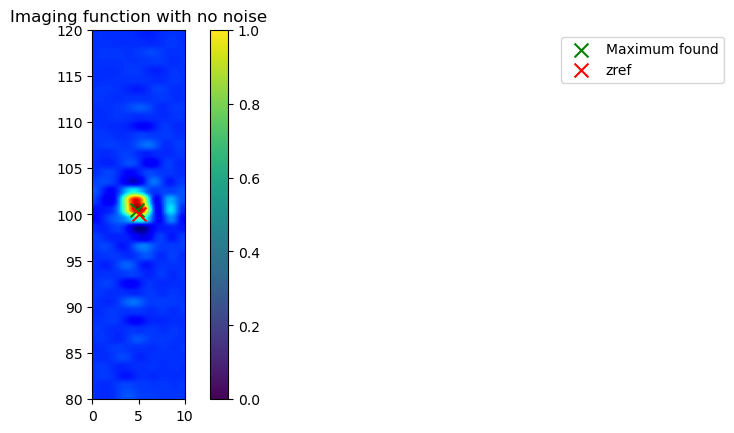

In [119]:
# plot the imaging function
def plot_result(I_grid,zref):
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.imshow(I_grid, extent=(l_inf_x,l_sup_x,l_inf_y,l_sup_y),origin='lower',cmap='jet')
    # add a point where the I_fun is maximum
    max_I=np.max(I_grid)
    max_I_index=np.unravel_index(np.argmax(I_grid, axis=None), I_grid.shape)
    plt.scatter(x[0][max_I_index],x[1][max_I_index],s=100,c='green',label='Maximum found',marker='x')
    plt.colorbar()
    plt.title('Imaging function with no noise')


    plt.scatter(zref[0],zref[1],s=100,c='red',label='zref',marker="x")
    # put the legend out of the img
    plt.legend(loc="upper left", bbox_to_anchor=(5, 1))
plot_result(I_grid,zref)



In [118]:
max_I_coords=x[0][max_I_index],x[1][max_I_index]
print("max I coords",np.linalg.norm(max_I_coords-zref[:2]))

max I coords 0.5286032853355959


# Stability Analysis